# Chapter: 7
## Section: Biases introduced in data generation and collection

In [1]:
import numpy as np
# specifying random seed for numpy
np.random.seed(42)

def disparate_impact_randomsample(sample_size, sampling_num = 100):
  """
  Generating random datasets and calculating disparate impact ratio for them

  :param sample_size: Number of datapoints in the generated synthetic random datasets
  :param sampling_num: Number of generated synthetic datasets
  :return List of calculated disparate impact ratios
  """
  disparate_impact = []
  for sam_iter in range(0, sampling_num):
    # generating random array of 0 and 1 as two groups with different privilidges (e.g. male versus female)
    group_category = np.random.randint(2, size=sample_size)
    # generating random array of 0 and 1 as the output labels (e.g. accepted for loan or not)
    output_labels = np.random.randint(2, size=sample_size)

    group0_label1 = [iter for iter in range(0, len(group_category)) if group_category[iter] == 0 and output_labels[iter] == 1]
    group1_label1 = [iter for iter in range(0, len(group_category)) if group_category[iter] == 1 and output_labels[iter] == 1]
    # calculating disparate impact
    disparate_impact.append(len(group1_label1)/len(group0_label1))

  return disparate_impact

In [2]:
sample_size_list = [50, 100, 1000, 10000, 1000000]
disparate_impact_list = []
for sample_size_iter in sample_size_list:
  disparate_impact_list.append(disparate_impact_randomsample(sample_size = sample_size_iter, sampling_num = 1000))

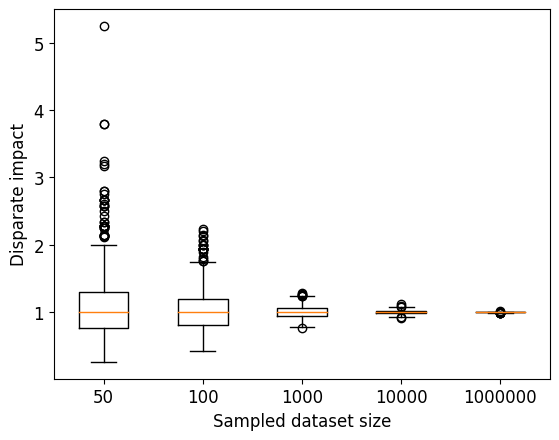

In [3]:
import matplotlib.pyplot as plt
# generating a boxplot of disparate impacts
# fig = plt.figure(figsize =(10, 7))
# ax = fig.add_axes([0, 0, 1, 1])
# bp = ax.boxplot(disparate_impact_list)
plt.boxplot(disparate_impact_list)
plt.xticks(np.arange(1, len(sample_size_list)+1), sample_size_list, fontsize = 12)
plt.yticks(fontsize = 12)
plt.xlabel("Sampled dataset size", fontsize = 12)
plt.ylabel("Disparate impact", fontsize = 12)
plt.show()

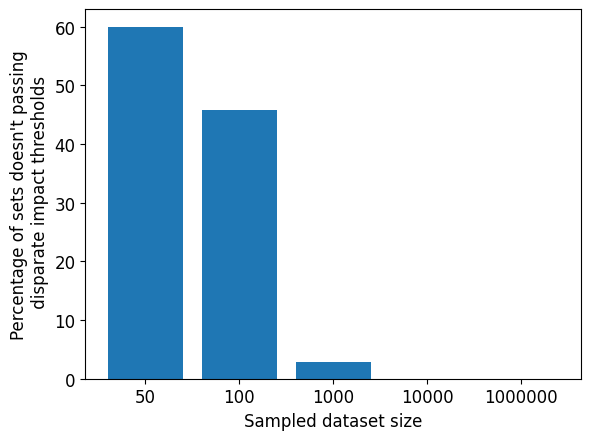

Percentage of sets doesn't passing disparate impact thresholds: [60.0, 45.8, 2.8, 0.0, 0.0]


In [4]:
# generating a barplot of percentage of sampled sets that doesn't pass disparate impact threshold of >= 0.8 and <=1.2
percentage_lowhigh_disparate = [100*len([iter for iter in disparate_iter if iter < 0.8 or iter > 1.2])/len(disparate_iter) for disparate_iter in disparate_impact_list]
plt.bar(x = np.arange(1, len(sample_size_list)+1),height = percentage_lowhigh_disparate)
plt.xticks(np.arange(1, len(sample_size_list)+1), sample_size_list, fontsize = 12)
plt.yticks(fontsize = 12)
plt.xlabel("Sampled dataset size", fontsize = 12)
plt.ylabel("Percentage of sets doesn't passing\n disparate impact thresholds", fontsize = 12)
plt.show()

print("Percentage of sets doesn't passing disparate impact thresholds: {}".format(percentage_lowhigh_disparate))